# **Introduction**

>  As a vehicle salesperson, I would like to create a model that can estimate the overall amount that consumers would spend.

###**Problem Statement**:
To predict amount paid for a car

### **Task type**:
*Regression*

### **Algorithm**:
Deep Learning **Artificial Neural Network** (ANN)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
git_url = 'https://raw.githubusercontent.com/SyedHabib14/ANN-CSPP/main/car_purchasing.csv'
df = pd.read_csv(git_url, encoding='latin-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
df.shape

(500, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [ ]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [ ]:
df["age"] = df["age"].astype(int)

In [ ]:
df.nunique()

customer name          498
customer e-mail        500
country                211
gender                   2
age                     44
annual Salary          500
credit card debt       500
net worth              500
car purchase amount    500
dtype: int64

In [ ]:
data = df.copy()

In [ ]:
data.drop(columns = ["customer name" , "customer e-mail" , "country"], axis = 1 , inplace = True)

In [ ]:
new_data =  ["age","annual Salary","credit card debt","net worth","car purchase amount"]

# **Getting an Idea about data through Visualization.....**

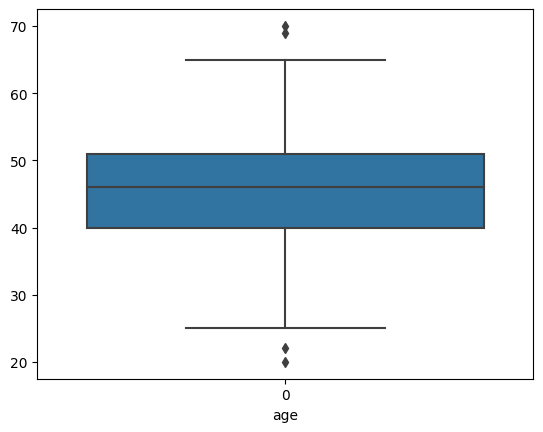

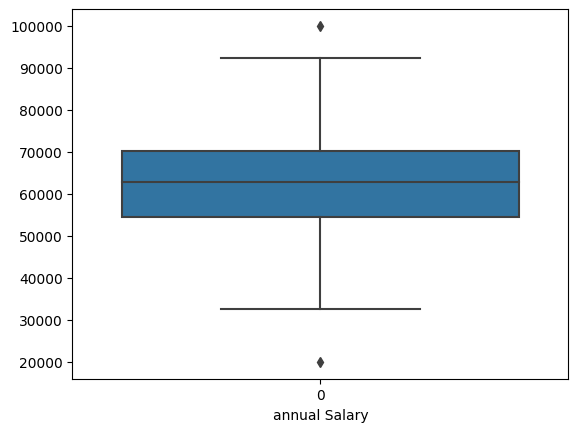

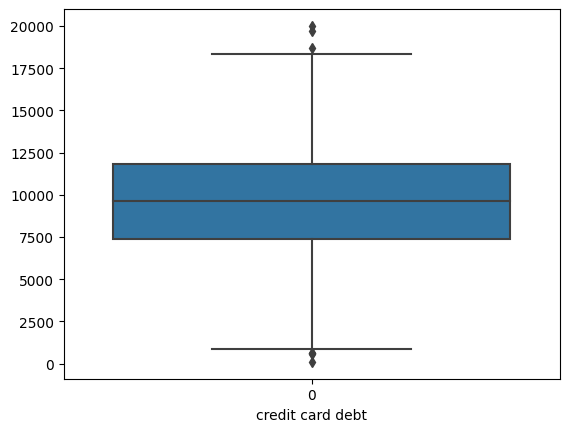

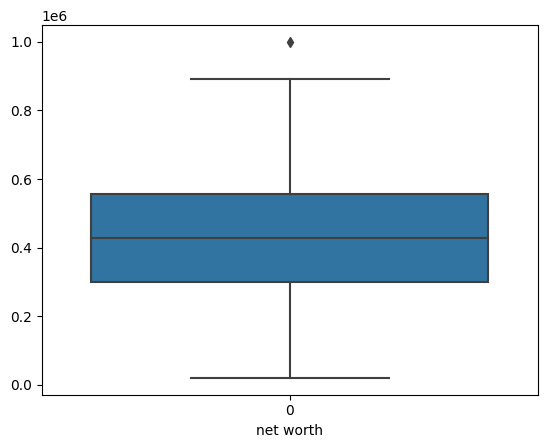

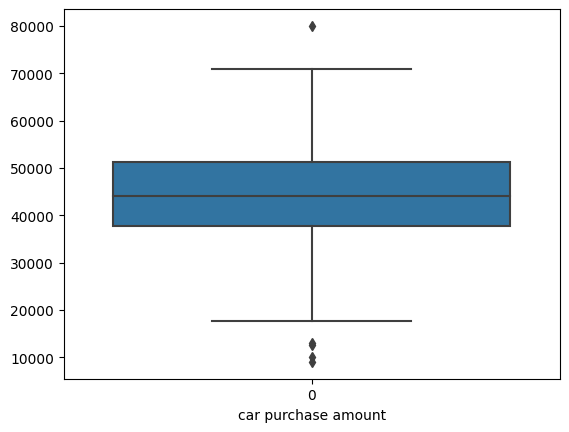

In [ ]:
for i in new_data:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()
    print()

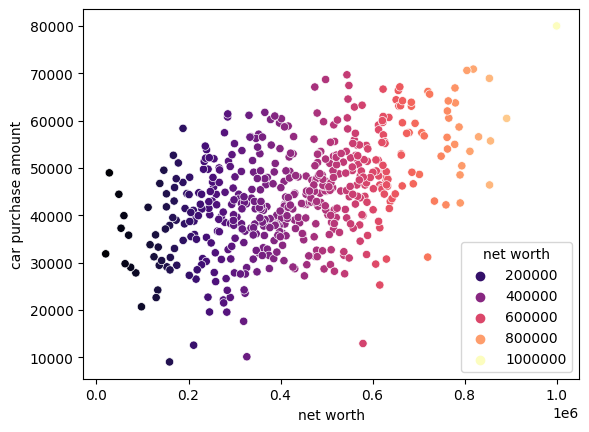

In [ ]:
sns.scatterplot(data = data , x = "net worth" , y = "car purchase amount" , hue = "net worth" , palette = "magma")
plt.show()

In [ ]:
data.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248


# **Splitting & Transforming....**

In [ ]:
X = data.drop(columns = ["car purchase amount"] , axis = 1)
Y = data["car purchase amount"]

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X)
Y = sc.fit_transform(Y.values.reshape(-1,1))

In [ ]:
print(X)
# shows transformed features of input

[[-1.01207287 -0.59819619  0.05857619  0.57427133 -1.11046945]
 [-1.01207287 -0.72349912  0.38657041 -0.0099515   0.57392937]
 [ 0.98807114 -0.34759033 -0.71236095  0.4454518   1.19397625]
 ...
 [ 0.98807114  0.90543897  0.57832106  0.28802326  1.92114437]
 [ 0.98807114  1.65725655 -1.05333541  1.26384749 -0.54019026]
 [ 0.98807114  0.02831846 -0.06470949 -0.06205457  0.18153098]]


In [ ]:
for i in range (12):
  print(Y[i])
# shows scaled output features upto 12

[-0.82586972]
[0.08415655]
[-0.11931261]
[2.15682037]
[1.08764431]
[1.15236364]
[-1.42013803]
[0.29967139]
[0.35343556]
[-0.55938203]
[1.37847633]
[-0.17849074]


In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.25 , random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(375, 5)
(125, 5)
(375, 1)
(125, 1)


# **Finally, we gonna train the model <3**

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU

In [ ]:
classifier = Sequential()


classifier.add(Dense(5 , activation = "ReLU"))

classifier.add(Dense(units = 4 , activation = "ReLU"))

classifier.add(Dense(units = 2 , activation = "ReLU"))

classifier.add(Dense(1 , activation = "linear"))

In [ ]:
classifier.compile(optimizer = "adam" , loss = "mean_squared_error" , metrics = ["mean_absolute_error"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early = EarlyStopping(
    monitor = "val_mean_absolute_error",
    min_delta = 0.001,
    patience = 10,
    verbose = True,
    mode = "auto",
    restore_best_weights = True)

In [ ]:
model = classifier.fit(X_train , Y_train , validation_split = 0.25 , batch_size = 10 , epochs = 200 , callbacks = early)

Epoch 1/200
29/29 [==============================] - 1s 17ms/step - loss: 0.9933 - mean_absolute_error: 0.7558 - val_loss: 1.0075 - val_mean_absolute_error: 0.8110
Epoch 2/200
29/29 [==============================] - 0s 6ms/step - loss: 0.9520 - mean_absolute_error: 0.7404 - val_loss: 0.9686 - val_mean_absolute_error: 0.7939
Epoch 3/200
29/29 [==============================] - 0s 5ms/step - loss: 0.9166 - mean_absolute_error: 0.7276 - val_loss: 0.9341 - val_mean_absolute_error: 0.7772
Epoch 4/200
29/29 [==============================] - 0s 5ms/step - loss: 0.8793 - mean_absolute_error: 0.7132 - val_loss: 0.8999 - val_mean_absolute_error: 0.7605
Epoch 5/200
29/29 [==============================] - 0s 5ms/step - loss: 0.8412 - mean_absolute_error: 0.6982 - val_loss: 0.8650 - val_mean_absolute_error: 0.7421
Epoch 6/200
29/29 [==============================] - 0s 5ms/step - loss: 0.7996 - mean_absolute_error: 0.6803 - val_loss: 0.8266 - val_mean_absolute_error: 0.7203
Epoch 7/200
29/29 [==

##**Time to Predict on Test Data and Evaluate our ANN Classifier's performance!** ⚡

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 4)                 24        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

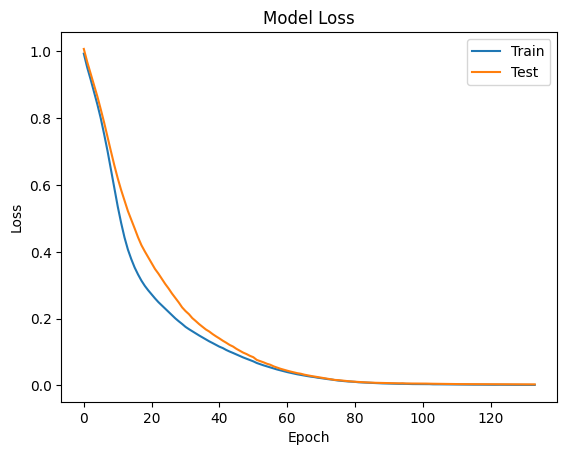

In [ ]:
plt.plot(model.history["loss"])
plt.plot(model.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train" , "Test"])
plt.title("Model Loss")
plt.show()

In [ ]:
Y_pred = classifier.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
for j in range (5):
  print(Y_pred[j])

[-0.54017353]
[-0.04867637]
[-1.4263492]
[0.71761286]
[-0.5657053]


In [ ]:
for k in range (5):
  print(Y_test[k])

[-0.48823496]
[-0.07509785]
[-1.37442876]
[0.73781113]
[-0.55440579]


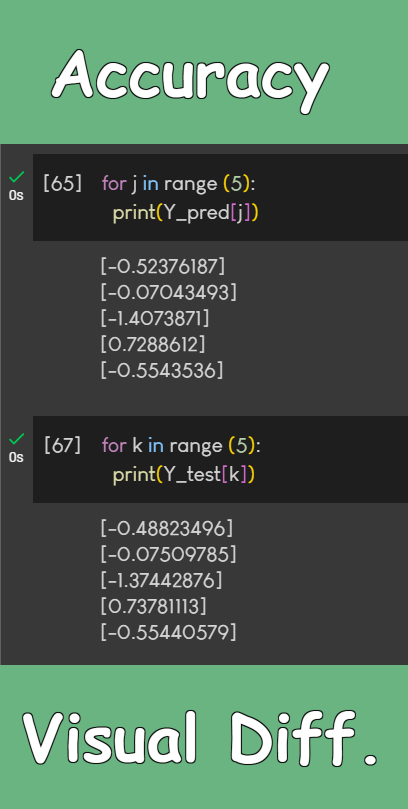

In [ ]:
from sklearn.metrics import r2_score

R2 = r2_score(Y_test, Y_pred)
print("R2 Score=",R2 )

R2 Score= 0.9959548412130136


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse.round(3))

Mean Squared Error: 0.004


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae.round(3))

Mean Absolute Error: 0.033
